## Полезные задачки для дальнейшей работы с искусственными нейронными сетями

## Работа с изображениями

Все изображения представляют собой матрицы чисел (или многомерные векторы), которые кодируют цвета отдельных пикселей. Для изображений высоты $H$, ширины $W$ с $C$ цветовыми каналами получаем упорядоченный набор  $H \times W \times C$ чисел.

<img src ="https://edunet.kea.su/repo/EduNet-content/L01/out/img_to_array.png" width="1000" >

Например, датасет CIFAR-10 содержит цветные (трехцветные) изображения размером $32 \times 32$ пикселя. Таким образом, каждое изображение из датасета является точкой в $3072$-мерном ($32 \times 32 \times 3 = 3072$) вещественном пространстве.

То есть все изображения по сути являются векторами, заполненными числами. В python есть несколько бибилиотек, которые отвечают за работу с векторами. Самыми часто используемыми для нейронных сетей -- библиотеки numpy и PyTorch.

Посмотрим на одну из цифр из набора данных MNIST, как её видим мы:

In [62]:
!wget -q 'https://edunet.kea.su/repo/EduNet-web_dependencies/L06/digit.png'

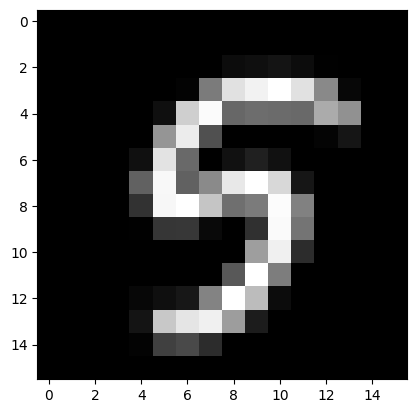

In [63]:
import numpy as np
from PIL import Image
from torchvision import utils
import matplotlib.pyplot as plt



image = Image.open("digit.png")
img_np = np.array(image)
plt.imshow(img_np, cmap="gray")
plt.show()

И как она записана в компьютере -- в виде набора векторов (матрицы):

In [64]:
print(img_np)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12  15  20  12   1   0   0   0]
 [  0   0   0   0   0   0   3 123 225 242 255 225 137   7   0   0]
 [  0   0   0   0   0  15 207 251 103 109 107 105 171 145   0   0]
 [  0   0   0   0   0 149 236  80   0   0   0   0   4  21   0   0]
 [  0   0   0   0  16 228 106   0  17  33  17   0   0   0   0   0]
 [  0   0   0   0  97 248  98 138 232 255 216  22   0   0   0   0]
 [  0   0   0   0  50 247 255 197 111 123 252 129   0   0   0   0]
 [  0   0   0   0   1  54  55   9   0  49 250 116   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 158 240  44   0   0   0   0]
 [  0   0   0   0   0   0   0   0  88 255 125   0   0   0   0   0]
 [  0   0   0   0   7  15  23 132 255 188  12   0   0   0   0   0]
 [  0   0   0   0  20 200 229 240 157  28   0   0   0   0   0   0]
 [  0   0   0   0   3  64  73  45   0   0   0   0   0   0   0 

Подключить библиотеки numpy (для более короткой записи кода и простоты её полное название сокращают до np) и torch, чтобы обеспечить работу с векторами:

In [1]:
## WRITE YOUR CODE HERE
import numpy as np
import torch

Рассмотрим основные операции для работы с тензорами.
Создать экземпляр класса [Tensor](https://pytorch.org/docs/stable/tensors.html#torch.Tensor).
Определение из документации: A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

In [4]:
e = torch.tensor([1, 2, 3])

e

tensor([1, 2, 3])

Записать вектор [1.1, 2.2, 3.2] в виде тензора и вывести его тип при помощи функции type.

In [10]:
a = torch.Tensor([1.1, 2.2, 3.2])
type(a)

torch.Tensor

Вопрос: чем принципиально отличаются записи a = torch.Tensor() и b = torch.tensor()? Что будет на выходе для a и для b?

In [18]:
a = torch.Tensor([1])
print('a: ', a, type(a))
b = torch.tensor([1])
print("b: ", b, type(a))

a:  tensor([1.]) <class 'torch.Tensor'>
b:  tensor([1]) <class 'torch.Tensor'>


Создать тензор [1.1, 2.2, 3.2] указанного типа float64. Использовать параметр dtype:

In [19]:
a = torch.tensor([1.1, 2.2, 3.2], dtype=torch.float64)

type(a)

torch.Tensor

Записать вектор [1.1, 2.2, 3.2] в виде тензора и вывести тип данных, которые помещены в тензор. Для этого так же использовать dtype.

In [41]:
a = torch.tensor([1.1, 2.2, 3.2], dtype=torch.float64)

a.type()

'torch.DoubleTensor'

Создать вектор размерности $3 \times 2$ и заполнить его указанным значением 2.5.

In [44]:
a = torch.zeros(3, 2)

a.fill_(2.5)

tensor([[2.5000, 2.5000],
        [2.5000, 2.5000],
        [2.5000, 2.5000]])

Создать тензор размерности $3 \times 2$ и заполнить его единицами.

In [45]:
a = torch.zeros(3, 2)
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Создать тензор размерности $2 \times 3 \times 4$ и заполнить его нулями.

In [46]:
b = torch.zeros(2, 3, 4)
b

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Создать тензор размерности 3 строки и 4 стоблца, заполненный случайными числами.

In [47]:
x = torch.rand(3, 4)
x

tensor([[0.3664, 0.2734, 0.0369, 0.2595],
        [0.2059, 0.0043, 0.7511, 0.8904],
        [0.8726, 0.9430, 0.1808, 0.9657]])

Создать тензор - вектор размерности $1 \times 5$, заполненный целыми случайными числами от 0 до 100.

In [55]:
y = torch.randint(0, 100, [1, 5])
print(y)

tensor([[34, 40, 69, 51, 51]])


Создать вектор размерности $2 \times 3$ и заполнить его целыми числами от -10 до 10.

In [56]:
a = torch.randint(-10, 10, [2, 3])
a 

tensor([[ -9,  -1, -10],
        [  7,  -9,   3]])

Для того, чтобы все величины, которые мы создаём при помощи датчика случайных чисел, создались один раз и не изменяли своего значения, надо зафиксировать базовое число --- это делается при помощи функции torch.manual_seed().
Функция torch.randn_like(x) возвращает тензор того же размера, что и x, который заполнен случайными числами из нормального распределения со средним 0 и дисперсией 1.

In [180]:
torch.manual_seed(7)
a = torch.randn([1, 5])
b = torch.randn_like(a)
print(f'a = {a},\nb = {b}'.format(a, b))

a = tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]]),
b = tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])


Создать вектор размерности $3 \times 2$ и заполнить его указанным значением 2.5.

In [183]:
a = torch.zeros([3, 2])
a.fill_(2.5)

tensor([[2.5000, 2.5000],
        [2.5000, 2.5000],
        [2.5000, 2.5000]])

Для выполнения операций умножения на веса или на матрицы свёрток (для свёрточных нейронных сетей), необходимо вытянуть матрицу, которой представлено изображение:

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 15, 20, 12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 123, 225, 242, 255, 225, 137, 7, 0, 0, 0, 0, 0, 0, 0, 15, 207, 251, 103, 109, 107, 105, 171, 145, 0, 0, 0, 0, 0, 0, 0, 149, 236, 80, 0, 0, 0, 0, 4, 21, 0, 0, 0, 0, 0, 0, 16, 228, 106, 0, 17, 33, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 248, 98, 138, 232, 255, 216, 22, 0, 0, 0, 0, 0, 0, 0, 0, 50, 247, 255, 197, 111, 123, 252, 129, 0, 0, 0, 0, 0, 0, 0, 0, 1, 54, 55, 9, 0, 49, 250, 116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 158, 240, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 255, 125, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 15, 23, 132, 255, 188, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 200, 229, 240, 157, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 64, 73, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


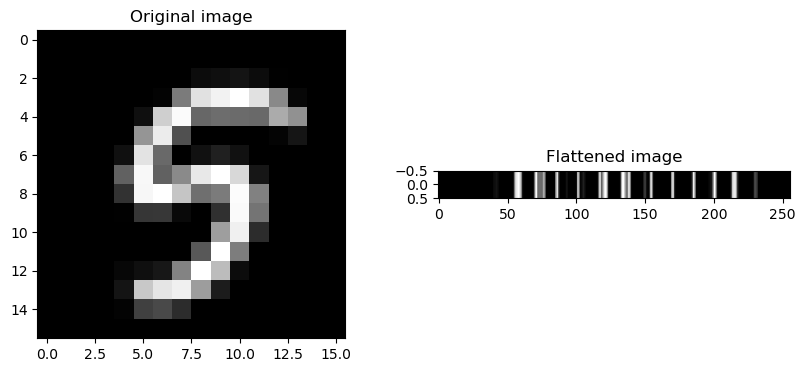

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
ax[0].imshow(img_np, cmap="gray")
ax[1].imshow(img_np.reshape(1, -1), aspect=20, cmap="gray")
ax[0].set_title("Original image")
ax[1].set_title("Flattened image")

vector = np.array(image).flatten()
print(list(vector))

Вытянуть тензор в одну линию можно при помощи функции flatten:

In [173]:
t = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(t.shape)
print(torch.flatten(t))

torch.Size([2, 2, 2])
tensor([1, 2, 3, 4, 5, 6, 7, 8])


Можно добавить в функцию flatten параметры, показывающие, с какого измерение по какое спрямлять тензор:

In [175]:
t_new = torch.flatten(t, start_dim=1, end_dim=1)
print(t_new, t_new.shape)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]]) torch.Size([2, 2, 2])


Ещё есть возможность, позволяющая представить вектор x в виде одномерного вектора (вытянуть в линию и в столбик все значения x) при помощи функции view:

In [60]:
x_row = x.view(-1, 12)
x_column = x.view(12, -1)
print(x_row,'\n',x_column)

tensor([[0.3664, 0.2734, 0.0369, 0.2595, 0.2059, 0.0043, 0.7511, 0.8904, 0.8726,
         0.9430, 0.1808, 0.9657]]) 
 tensor([[0.3664],
        [0.2734],
        [0.0369],
        [0.2595],
        [0.2059],
        [0.0043],
        [0.7511],
        [0.8904],
        [0.8726],
        [0.9430],
        [0.1808],
        [0.9657]])


В целом функция view может поменять форму тензора на любую допустимую. Изменить форму вектора x на $2 \times 6$.


In [69]:
x.view(2, 6)

tensor([[0.3664, 0.2734, 0.0369, 0.2595, 0.2059, 0.0043],
        [0.7511, 0.8904, 0.8726, 0.9430, 0.1808, 0.9657]])

## Операции умножения внутри нейрона

Модель нейрона взята из биологии и структура повторяет процесс передачи информации через нейрон. Входной сигнал обрабатывается и дальше принимается решение, насколько он важен и передавать ли его дальше.

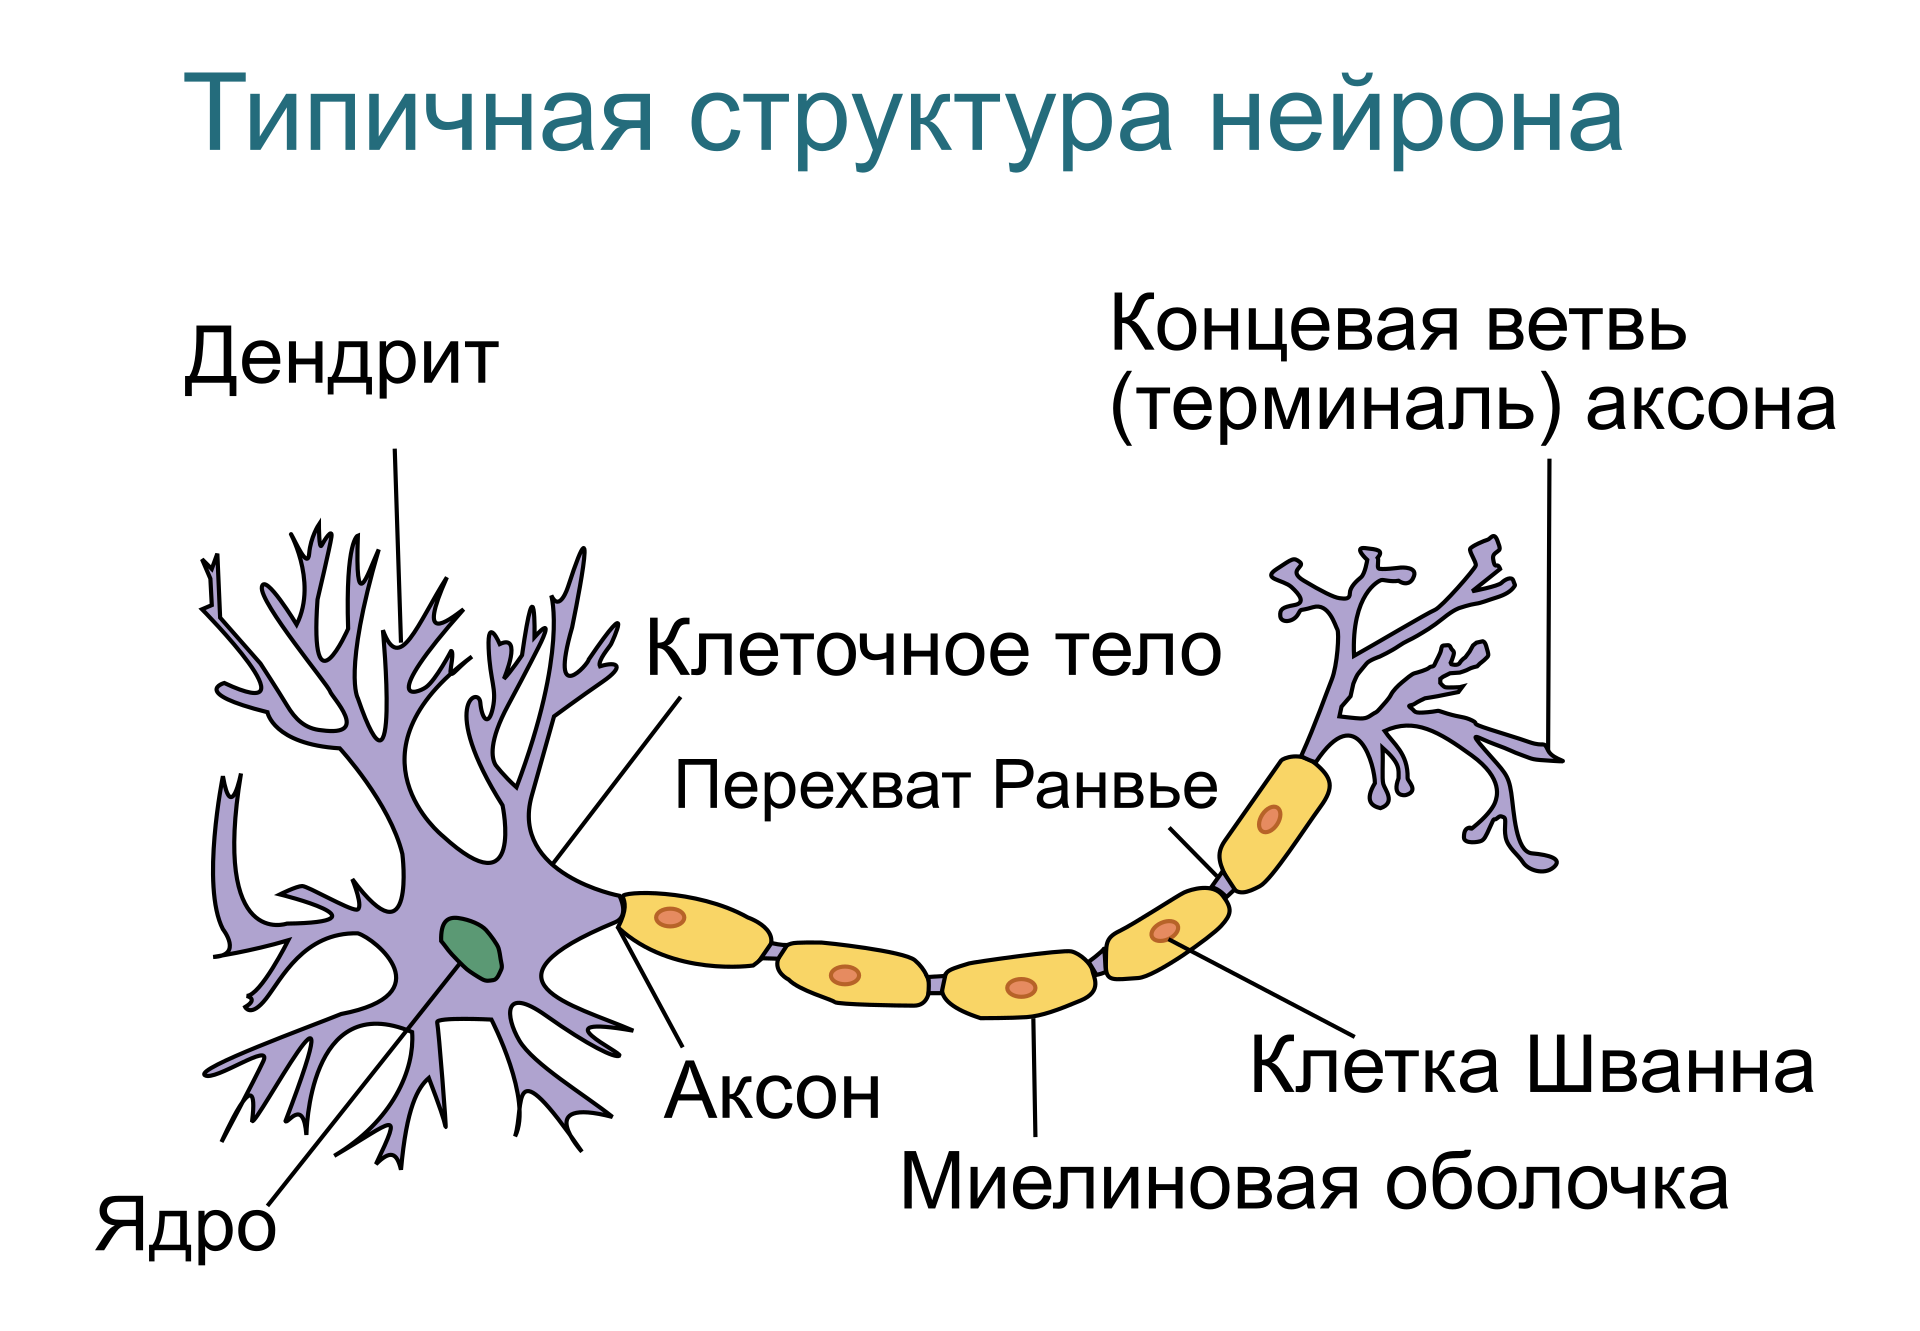


Та же логика ипользовалась при создании модели искусственного нейрона: входные данные умножаются на веса, передаются функции активации, которая их преобразует и передаёт дальше:
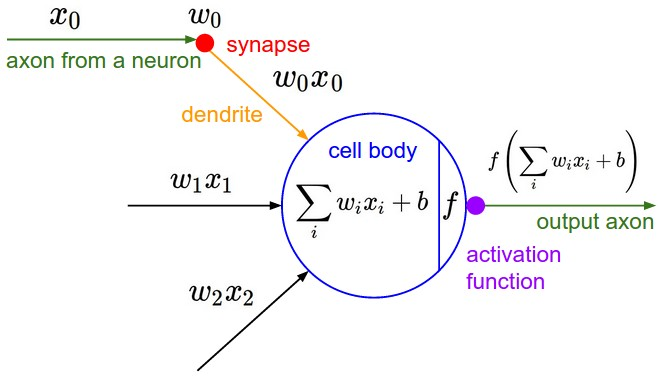

При перемножении заданных значений на веса необходимо использовать векторное произведение.
Создать два тензора размера $2 \times 3$ и $3 \times 5$ и векторно перемножить их. Вывести на экран результирующий тензор и его размерность.

In [67]:
a = torch.randint(0, 100, [2, 3])
b = torch.randint(0, 100, [3, 5])
res = a @ b
print(res,'\n',res.shape)

tensor([[2880, 5204, 3670, 3758, 3608],
        [4874, 2729, 7965, 7789, 3616]]) 
 torch.Size([2, 5])


При умножении на веса бывает необходимо транспонировать данные (поменять порядок расположения осей).
Изменить порядок расположения осей тензора x (транспонировать) можно двумя способами: при помощи  метода T и функции transpose().

In [83]:
a = a.transpose(0, 1)
print(x)
print(a)
b = b.transpose(0, 1)
print(b)

tensor([[0.3664, 0.2734, 0.0369, 0.2595],
        [0.2059, 0.0043, 0.7511, 0.8904],
        [0.8726, 0.9430, 0.1808, 0.9657]])
tensor([[ 7, 83,  0],
        [67,  0, 65]])
tensor([[32, 32, 42],
        [32, 60,  9],
        [50, 40, 71],
        [27, 43, 92],
        [53, 39,  1]])


Найти сумму всех элементов тензора a.

In [89]:
## WRITE YOUR CODE HERE
print(a)
print(a.sum())

tensor([[ 7, 83,  0],
        [67,  0, 65]])
tensor(222)


Найти сумму всех элементов тензора a по строкам.

In [91]:
## WRITE YOUR CODE HERE
a.sum(1)

tensor([ 90, 132])

Найти сумму всех элементов тензора a по столбцам.

In [94]:
## WRITE YOUR CODE HERE
a.sum(-2)

tensor([74, 83, 65])

Найти максимальные значения вектора x по столбцам и строкам при помощи функции max.

In [95]:
x

tensor([[0.3664, 0.2734, 0.0369, 0.2595],
        [0.2059, 0.0043, 0.7511, 0.8904],
        [0.8726, 0.9430, 0.1808, 0.9657]])

In [100]:
x.max(1)

torch.return_types.max(
values=tensor([0.3664, 0.8904, 0.9657]),
indices=tensor([0, 3, 3]))

In [109]:
rows = x.max(1).values
columns = x.max(-2).values
print(f"rows:\n {rows}, \ncolumns: \n {columns}".format(rows, columns))

rows:
 tensor([0.3664, 0.8904, 0.9657]), 
columns: 
 tensor([0.8726, 0.9430, 0.7511, 0.9657])


Создать два тензора [[5, 0, 1], [6, 0, 2]] и [[2, 3, 0], [3, 4, 5]]. Найти максимум из двух тензоров на каждом месте при помощи функции maximum:

In [110]:
## WRITE YOUR CODE HERE
a = torch.tensor([[5, 0, 1], [6, 0, 2]])
b = torch.tensor([[2, 3, 0], [3, 4, 5]])

torch.maximum(a, b)

tensor([[5, 3, 1],
        [6, 4, 5]])

В разных библиотеках наборы данных изображений обрабатываются в разных форматах:

OpenCV, TensorFlow, Pillow, etc. : `Batch x Height x Width x Channels`

PyTorch : `Batch x Channels x Height x Width`

Поэтому периодически возникает необходимость менять местами измерения или убирать какие-то измерения.

Создать тензор a размерности $(2, 5, 1, 8)$, заполнить его нулями и поменять местами его измерения $(0, 1, 2, 3) \to (2, 0, 3, 1)$ при помощи функции permute:

In [144]:
a = torch.zeros([2, 5, 1, 8])
print("Original tensor size:\n", a.size())

a = a.permute(2, 0, 3, 1)
print("After permute tensor size:\n", a.size())

Original tensor size:
 torch.Size([2, 5, 1, 8])
After permute tensor size:
 torch.Size([1, 2, 8, 5])



Создать тензор b размерности $(2, 5, 1, 8)$, заполнить его единицами и поменять местами его измерения $(0, 1, 2, 3) \to (1, 2, 0, 3)$ при помощи функции transpose из библиотеки numpy. Вывести результат на экран:

In [126]:
b = torch.ones([2, 5, 1, 8])

np.transpose(b, [1, 2, 0, 3]).size()

torch.Size([5, 1, 2, 8])

Удалить измерение, равное 1, у вектора a при помощи функции squeeze:

In [145]:
a = a.squeeze(0)
print("After squeeze tensor size:\n", a.size())

After squeeze tensor size:
 torch.Size([2, 8, 5])


Добавить ещё одно измерение для тензора a и поставить его на место 1 при помощи функции unsqueeze:

In [146]:
a = a.unsqueeze(0)
a.size()

torch.Size([1, 2, 8, 5])

Функция transpose может поменять местами два указанных измерения. Создать вектор размерности $2 \times 2 \times 3$ и поменять местами измерения 1 и 2:

In [181]:
t = torch.rand(2, 2, 3)
print('t: ', t)
print('t transpose: ', t.transpose(1, 2))

t:  tensor([[[0.8829, 0.4132, 0.7572],
         [0.6948, 0.5209, 0.5932]],

        [[0.8797, 0.6286, 0.7653],
         [0.1132, 0.8559, 0.6721]]])
t transpose:  tensor([[[0.8829, 0.6948],
         [0.4132, 0.5209],
         [0.7572, 0.5932]],

        [[0.8797, 0.1132],
         [0.6286, 0.8559],
         [0.7653, 0.6721]]])


Для подсчёта точности модели бывает необходимо сравнить совпадение вектора с метками данных с выходными (предсказанными значениями).
Посчитать количество совпадений (на одинаковых местах одинаковые числа) для двух векторов [9, 4, 3, 9, 6] и [5, 4, 5, 9, 4].

In [171]:
## WRITE YOUR CODE HERE
a = torch.tensor([9, 4, 3, 9, 6])
b = torch.tensor([5, 4, 5, 9, 4])

torch.sum(a == b).item()

2

Чтобы обратиться к элементу тензора, надо указать в скобках его индекс, но в таком случае получим tensor(int). Чтобы получить значение элемента, надо использовать метод item.
Создать тензор $[6, 6, 7, 2, 7, 9, 1, 5]$ и найти его 2й элемент, и значение 2го элемента:

In [172]:
l = torch.tensor([6, 6, 7, 2, 7, 9, 1, 5])
print(l[1])
print(l[1].item())

tensor(6)
6
